# AUC-ROC for Multi-Class Classification
The AUC-ROC curve is only for binary classification problems. But we can extend it to multiclass classification problems by using the One vs All technique.

So, if we have three classes 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e. 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.

The ROC curve for multi-class classification models can be determined as below:

In [7]:
# multi-class classification
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



lets start with generating a multi-class dataset

In [8]:
# generate 3 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I used XGBoost Classifier to fit my data.

In [12]:
# fit model
clf = OneVsRestClassifier(XGBClassifier())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

Calculate the ROC curve values

In [13]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

Lets plot the ROC curves:

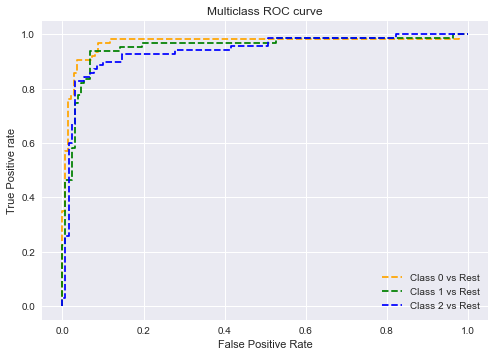

In [16]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    